# Homework 3: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/README.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (4 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [5]:
#install.packages("gapminder")
library("gapminder")

head(gapminder)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

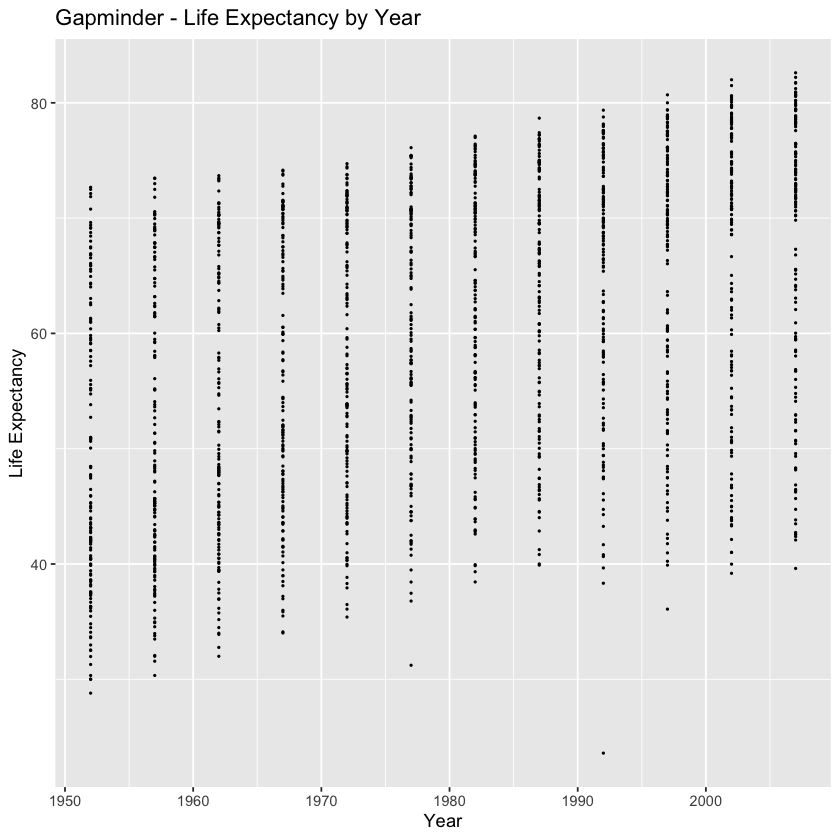

In [23]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp)) +
    geom_point(size=0.25) +
    xlab("Year") +
    ylab("Life Expectancy") +
    ggtitle("Gapminder - Life Expectancy by Year")
p

We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so. 

What trends can you identify in the data? 

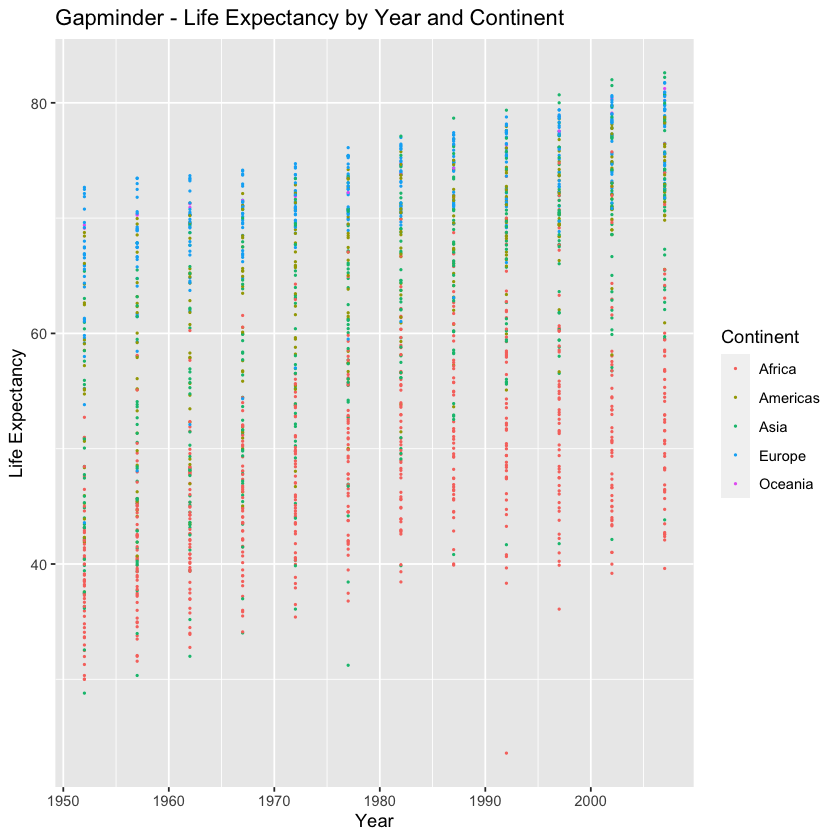

In [24]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp, color=continent)) +
    geom_point(size=0.25) +
    xlab("Year") +
    ylab("Life Expectancy") +
    labs(color="Continent") +
    ggtitle("Gapminder - Life Expectancy by Year and Continent")
p

**Overall Trends:** As one would expect, there is a positive linear trend between the recorded year and life expectancy -- eyeballing, from about $\mu_{1952} \approx 50, \sigma_{1952} \approx 10$ to $\mu_{2007} \approx 58, \sigma_{2007} \approx 10$. Of particular interest to me is that the standard deviation between the years seems to change minimally, whereas I would have expected it to grow as time progressed as a result of rising global inequality.

**Subpopulation Trends:** Unsurprisingly, we find heavy stratification between continents, in particular Europe "on top" and Africa "on bottom." These are also the two continents with the least amount of variance within their respective populations, likely due to the socioeconomic homogeneity of these regions (whereas the Americas, for example, are quite variant due to its wealth disparity). Each continent shows its own upwards linear trend, and they are more or less parallel to one another if I were to fit them with the naked eye. 

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot. 

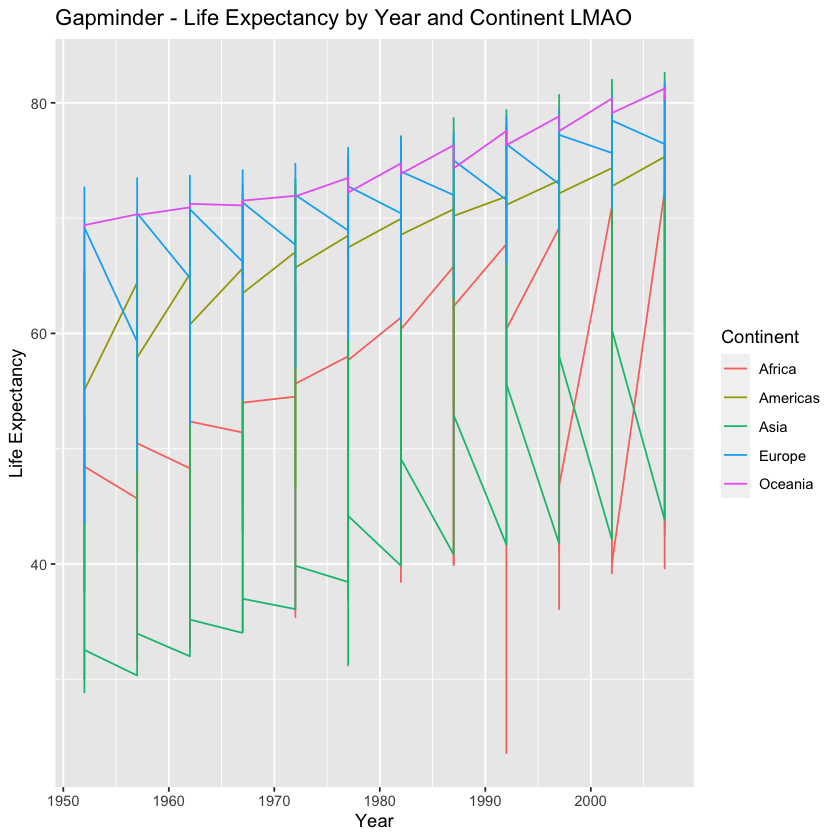

In [36]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp, color=continent)) +
    geom_line()+
    #geom_point(size=0.25) +
    xlab("Year") +
    ylab("Life Expectancy") +
    labs(color="Continent") +
    ggtitle("Gapminder - Life Expectancy by Year and Continent LMAO")
p

Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

**Answer:** At each year, *geom_line()* ties each point of a given color together. When year changes, whatever the last point plotted was is connected to the first point for that continent collected at the new year. Yikes!

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

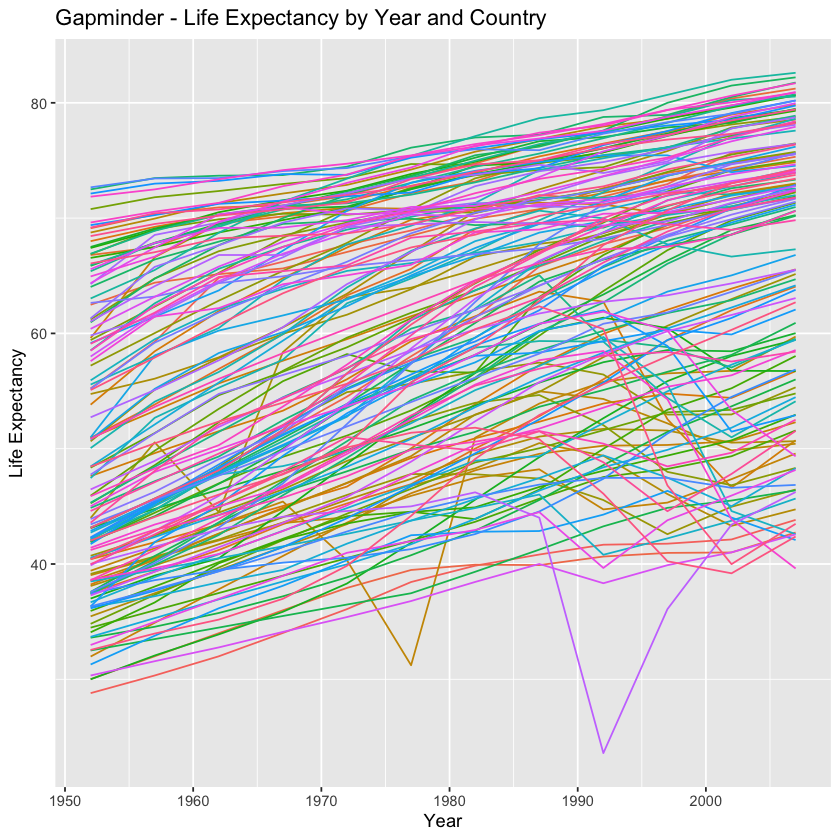

In [35]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp, color=country)) +
    geom_line()+
    #geom_point(size=0.25) +
    xlab("Year") +
    ylab("Life Expectancy") +
    ggtitle("Gapminder - Life Expectancy by Year and Country")
p + theme(legend.position = "none")

But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer). 

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

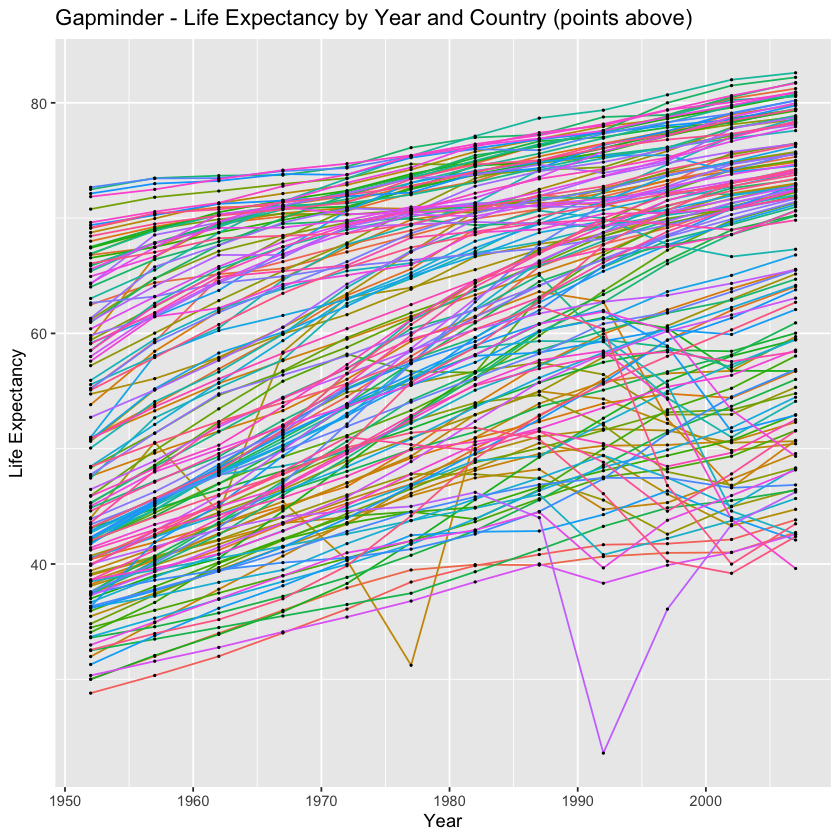

In [39]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp, color=country)) +
    geom_line()+
    geom_point(color = "black", size=0.25) +
    xlab("Year") +
    ylab("Life Expectancy") +
    ggtitle("Gapminder - Life Expectancy by Year and Country (points above)")
p + theme(legend.position = "none")

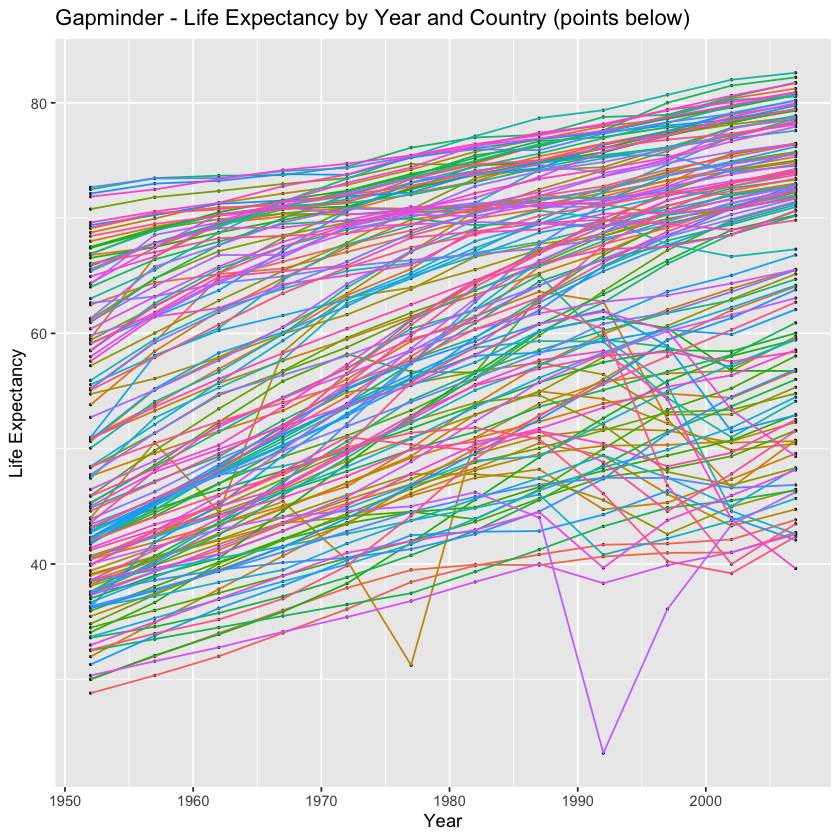

In [40]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp, color=country)) +
    geom_point(color = "black", size=0.25) +
    geom_line() +
    xlab("Year") +
    ylab("Life Expectancy") +
    ggtitle("Gapminder - Life Expectancy by Year and Country (points below)")
p + theme(legend.position = "none")

---
# 2. Adding statistics (3 points)

`ggplot2` allows easy overlay of statistical models on top of the data. 

The graph below shows the relationship between life expectency and GDP per capita:

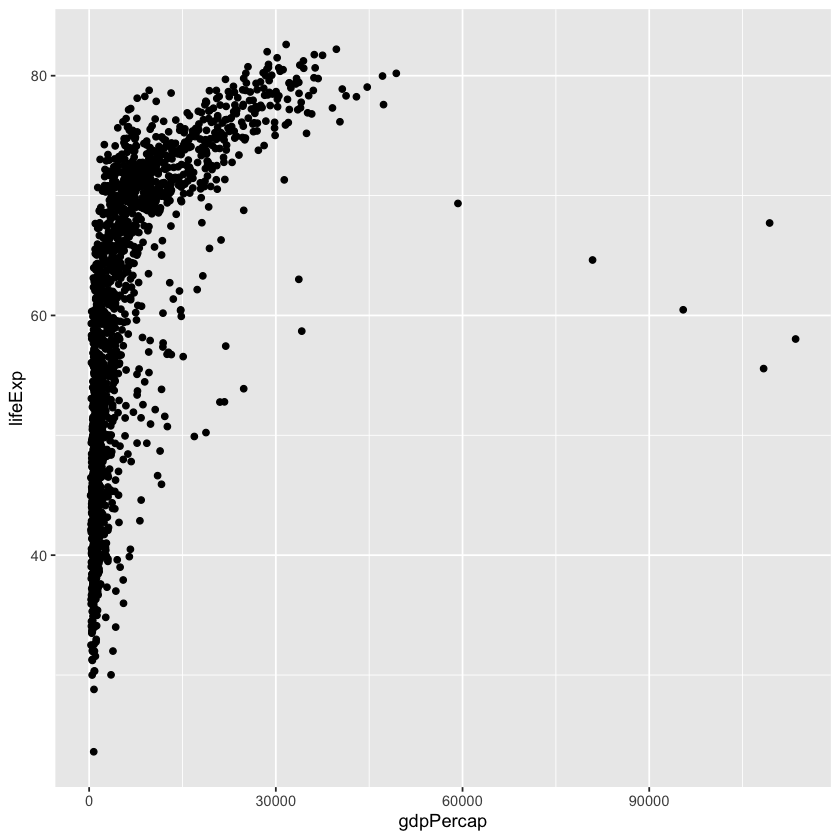

In [41]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

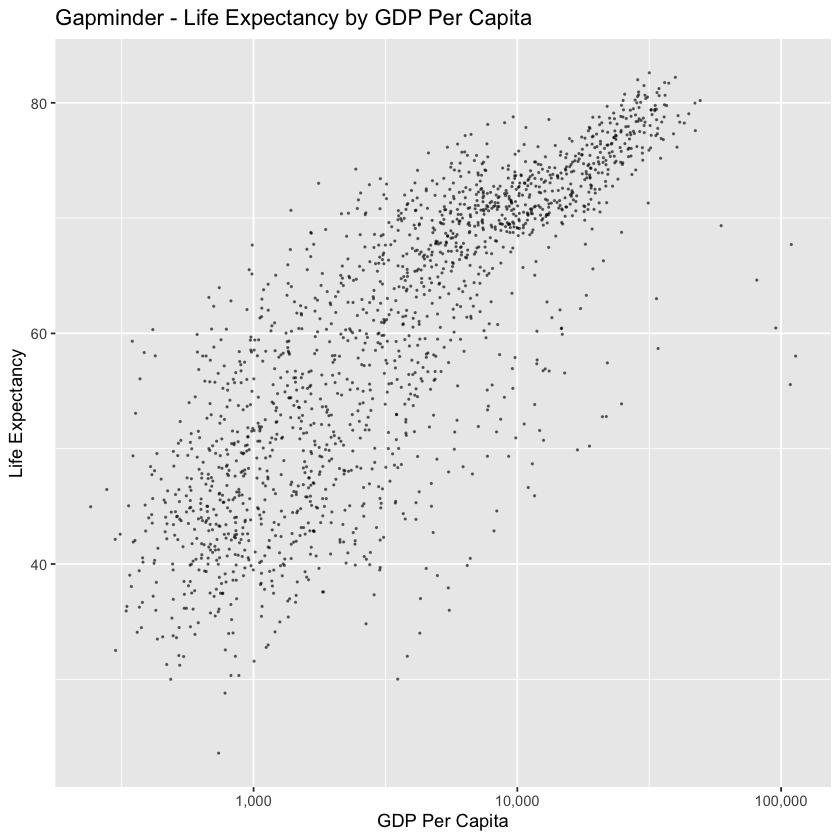

In [60]:
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
    geom_point(size=0.25,alpha=0.5) +
    #xlim(0,50000) +
    xlab("GDP Per Capita") +
    ylab("Life Expectancy") +
    ggtitle("Gapminder - Life Expectancy by GDP Per Capita")

p + scale_x_continuous(trans='log10',breaks=c(1e+03,1e+04,1e+05),labels=c("1,000","10,000","100,000"))

Already we can more easily visualize the trend in the data. 

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



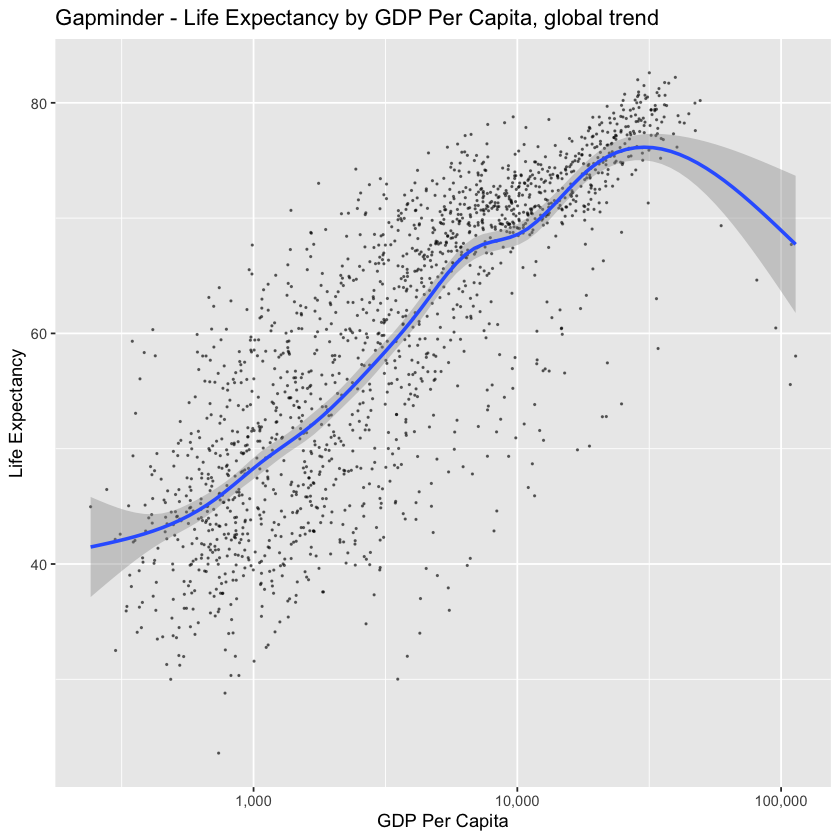

In [74]:
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
    geom_point(size=0.25,alpha=0.5) +
    #xlim(0,50000) +
    xlab("GDP Per Capita") +
    ylab("Life Expectancy") +
    ggtitle("Gapminder - Life Expectancy by GDP Per Capita, global trend") +
    geom_smooth()

p + scale_x_continuous(trans='log10',breaks=c(1e+03,1e+04,1e+05),labels=c("1,000","10,000","100,000"))

Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements. 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



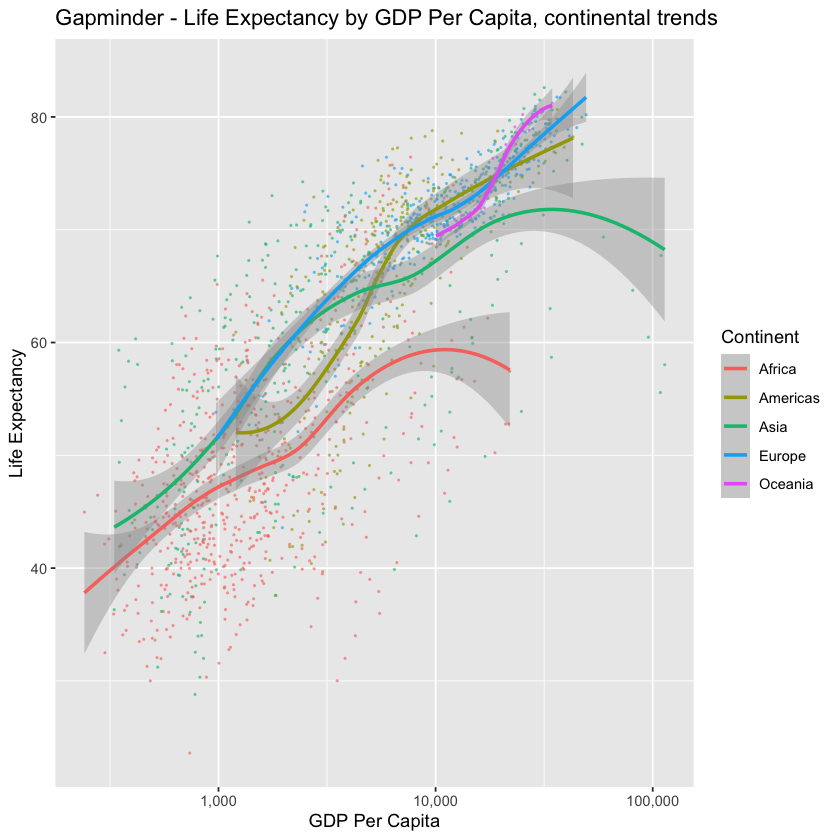

In [75]:
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp, color=continent)) +
    geom_point(size=0.25,alpha=0.5) +
    #xlim(0,50000) +
    xlab("GDP Per Capita") +
    ylab("Life Expectancy") +
    labs(color="Continent") +
    ggtitle("Gapminder - Life Expectancy by GDP Per Capita, continental trends") +
    geom_smooth()

p + scale_x_continuous(trans='log10',breaks=c(1e+03,1e+04,1e+05),labels=c("1,000","10,000","100,000"))

---
# 3. Multipanel figures (3 points)

In question 1, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

First, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

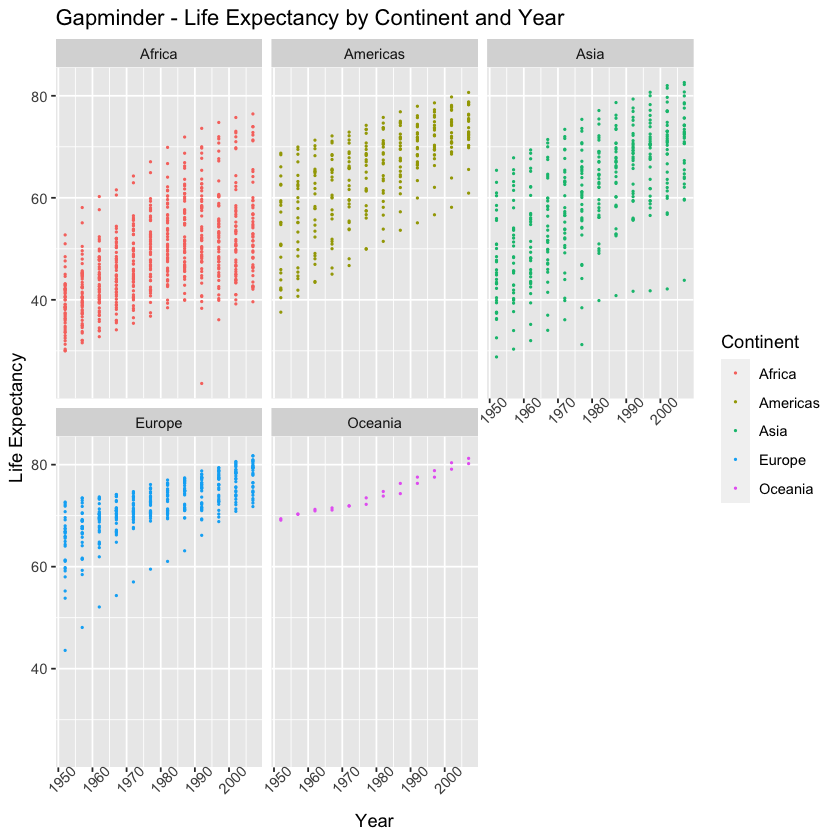

In [86]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp, color=continent)) +
    geom_point(size=0.25) +
    xlab("Year") +
    ylab("Life Expectancy") +
    labs(color="Continent") +
    ggtitle("Gapminder - Life Expectancy by Continent and Year") +
    facet_wrap(~ continent)

p + theme(axis.text.x = element_text(angle = 45))

Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

**Tim Nolan comment:** I've been doing this the whole time :)

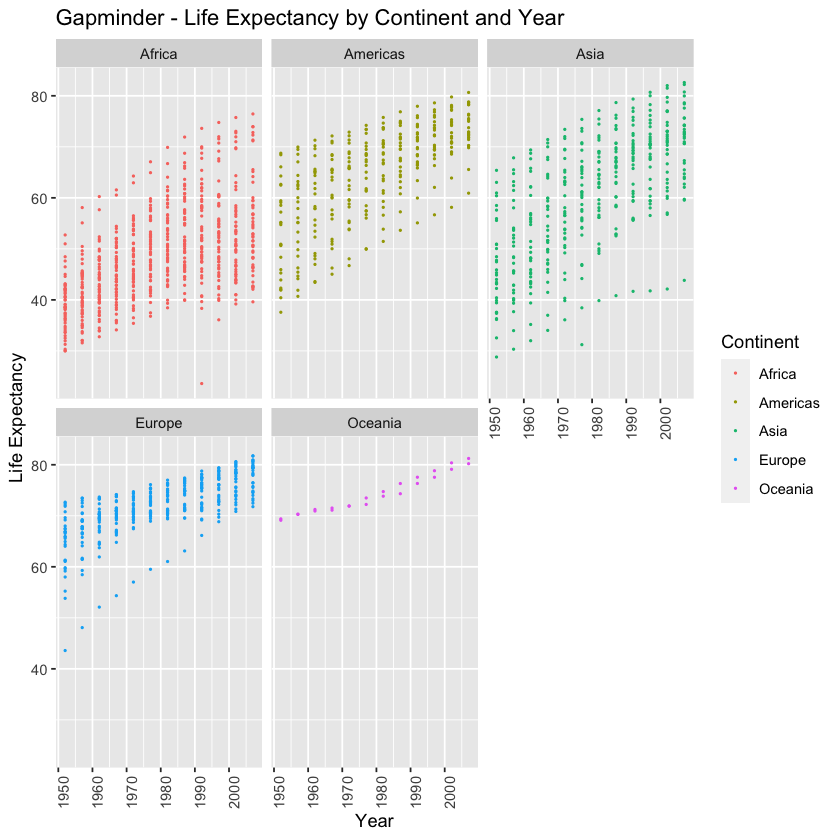

In [85]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = year, y = lifeExp, color=continent)) +
    geom_point(size=0.25) +
    xlab("Year") +
    ylab("Life Expectancy") +
    labs(color="Continent") +
    ggtitle("Gapminder - Life Expectancy by Continent and Year") +
    facet_wrap(~ continent)

p + theme(axis.text.x = element_text(angle = 90))

Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

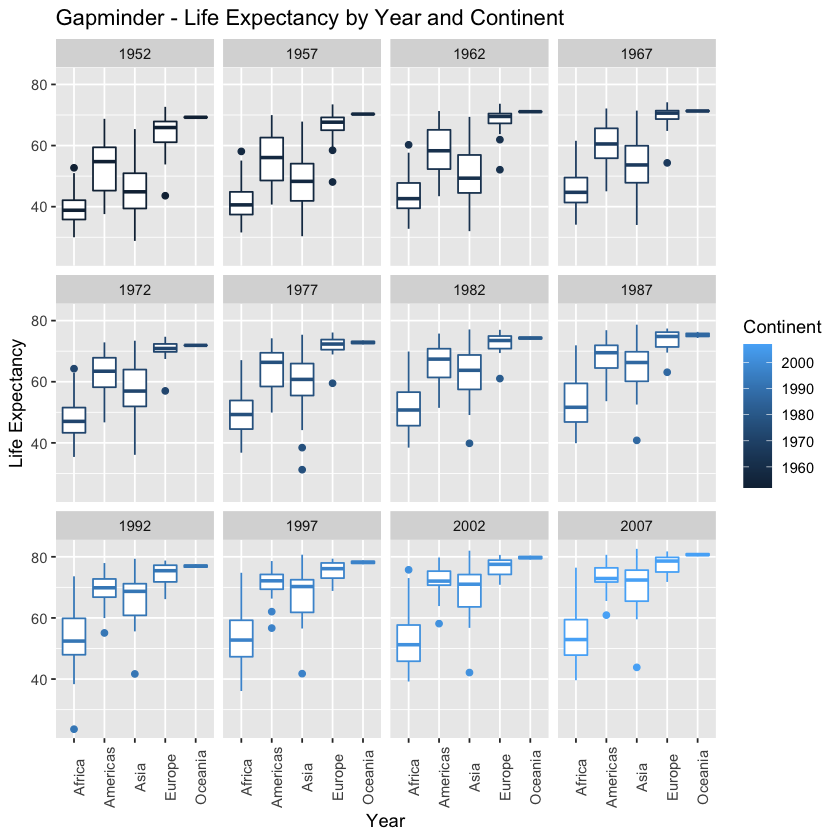

In [84]:
library("ggplot2")
p <- ggplot(data = gapminder, aes(x = continent, y = lifeExp, color=year)) +
    geom_boxplot() +
    xlab("Year") +
    ylab("Life Expectancy") +
    labs(color="Continent") +
    ggtitle("Gapminder - Life Expectancy by Year and Continent") +
    facet_wrap(~ year)

p + theme(axis.text.x = element_text(angle = 90))

That's all for Homework 3! When you are finished, save the notebook as Homework3.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas. 

**DUE:** 5pm EST, Feb 24, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*